<a href="https://colab.research.google.com/github/harshi3-code/cnn1-harshi/blob/main/Copy_of_ICP6HarshithaGontu700766967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gontu Harshitha
700766967

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.6962 - val_loss: 0.6960
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.6959 - val_loss: 0.6957
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6956 - val_loss: 0.6954
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6951 - val_loss: 0.6949


Adding another hidden layer between the encoded representation and the output layer. Here’s the updated code:

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the encoded representation
encoding_dim = 32  # Size of the encoded representation

# Input placeholder
input_img = Input(shape=(784,))
# Encoder layers
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoded representation
# Decoder layers
decoded = Dense(128, activation='relu')(encoded)  # New hidden layer for reconstruction
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.4725 - val_loss: 0.3223
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3261 - val_loss: 0.3081
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3158 - val_loss: 0.3023
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3103 - val_loss: 0.2993
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3076 - val_loss: 0.2967
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


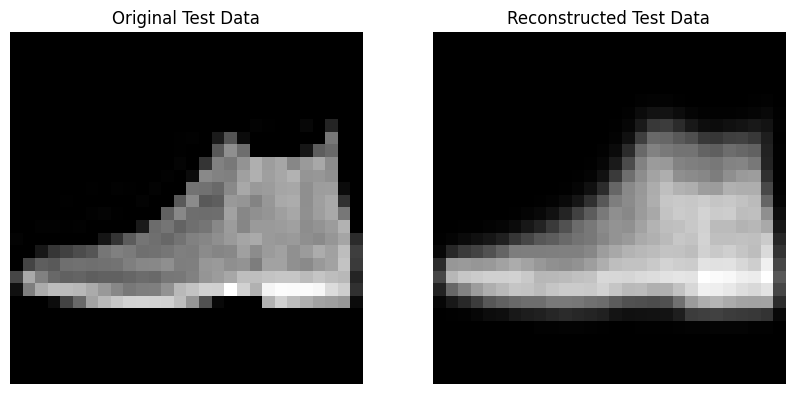

In [1]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the encoded representation
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))
# Encoder layers
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer
encoded = Dropout(0.2)(encoded)  # Dropout for regularization
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(128, activation='relu')(encoded)  # New hidden layer for reconstruction
decoded = Dropout(0.2)(decoded)  # Dropout for regularization
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
t = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape x_train to match the input shape of the autoencoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# ... (rest of the code)
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Visualize some original and reconstructed samples
sample_index = 0  # Change this index to visualize different samples
original_sample = x_test[sample_index].reshape(28, 28)
reconstructed_sample = autoencoder.predict(x_test)[sample_index].reshape(28, 28)

# Plot original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_sample, cmap='gray')
plt.title('Original Test Data')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title('Reconstructed Test Data')
plt.axis('off')

plt.show()


In [2]:
# Make predictions on the test data
predictions = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


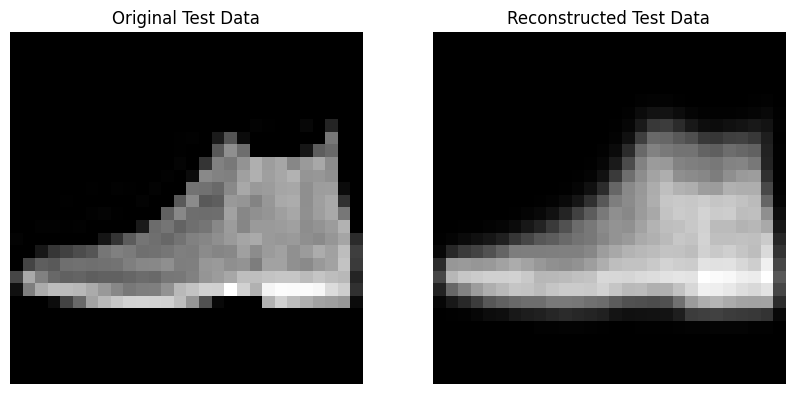

In [3]:
# Select a sample index to visualize
sample_index = 0  # Change this index to visualize different samples

# Original and reconstructed data
original_sample = x_test[sample_index].reshape(28, 28)  # Reshape to original image dimensions
reconstructed_sample = predictions[sample_index].reshape(28, 28)  # Reshape to original image dimensions

# Plot original and reconstructed images
plt.figure(figsize=(10, 5))

# Original sample
plt.subplot(1, 2, 1)
plt.imshow(original_sample, cmap='gray')
plt.title('Original Test Data')
plt.axis('off')

# Reconstructed sample
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title('Reconstructed Test Data')
plt.axis('off')

plt.show()


Question 3 and 4:

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6966 - val_loss: 0.6963
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6962 - val_loss: 0.6959
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6958 - val_loss: 0.6955
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6954 - val_loss: 0.6951
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6950 - val_loss: 0.6947
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6943 - val_loss: 0.6940
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6940 - val_loss: 0.6937
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6937 - val_loss: 0.6934
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6933 - val_loss: 0.6931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


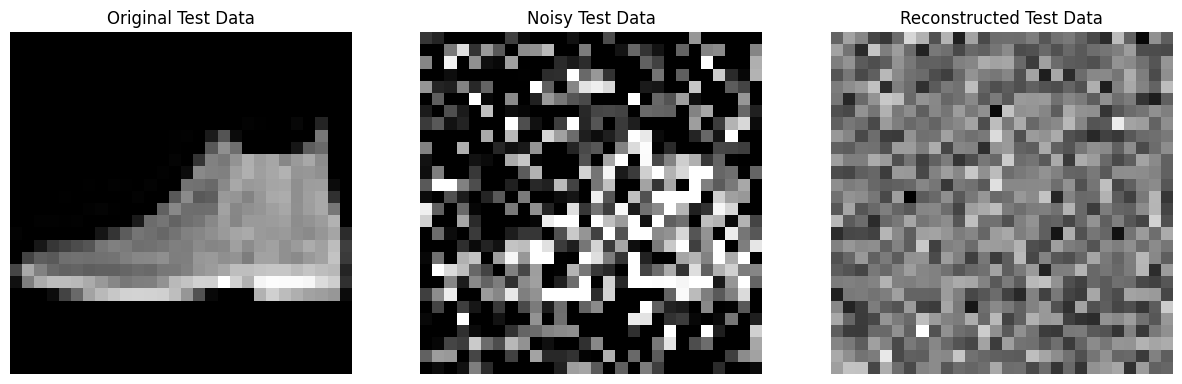

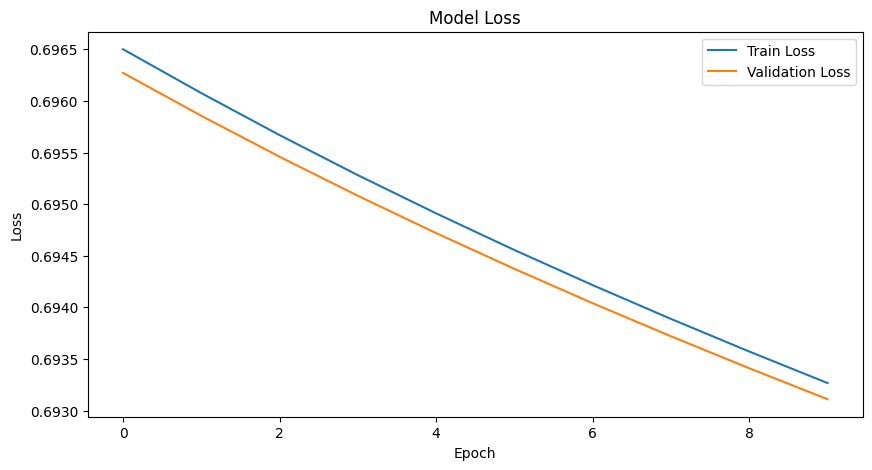

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Size of the encoded representation
encoding_dim = 32  # 32 floats

# Input placeholder
input_img = Input(shape=(784,))
# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Make predictions
predictions = autoencoder.predict(x_test_noisy)

# Visualization
sample_index = 0  # Change this index to visualize different samples
original_sample = x_test[sample_index].reshape(28, 28)
noisy_sample = x_test_noisy[sample_index].reshape(28, 28)
reconstructed_sample = predictions[sample_index].reshape(28, 28)

# Plot original, noisy, and reconstructed images
plt.figure(figsize=(15, 5))

# Original sample
plt.subplot(1, 3, 1)
plt.imshow(original_sample, cmap='gray')
plt.title('Original Test Data')
plt.axis('off')

# Noisy sample
plt.subplot(1, 3, 2)
plt.imshow(noisy_sample, cmap='gray')
plt.title('Noisy Test Data')
plt.axis('off')

# Reconstructed sample
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title('Reconstructed Test Data')
plt.axis('off')

plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
